Author: Amy Weng 

This code file finds the frequencies of authors, dates, titles, publishers, target words, and other interesting data over time. 


In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

directory = '/home/rapiduser/Materials/Texts'

def frequency(freqs, filename, item):
    readFile = pd.read_csv(filename) 
    
    for i in range(len(readFile.index)):
        data = readFile[i:(i+1)]
        date = data.iloc[0].date
        if date not in range(1660,1700+1):
            continue

        if (item == "author"):
            i = data.iloc[0].author
        if (item == "title"):
            i = data.iloc[0].title
        if (item == "date"):
            i = date
        if (item == "publisher"):
            i = data.iloc[0].publisher
        
        if i not in freqs.keys(): 
            freqs[i] = 0
        
        freqs[i] += 1
    
    # if (item == "date"):
    #     for year in sorted(freqs):
    #         print(str(year)+": "+str(freqs[year]))
    # else: 
    #     for pair in sorted (freqs.items(), key=lambda kv:(kv[1], kv[0]), reverse=True):
    #         print(pair)
            
def organize(filename):

    readFile = pd.read_csv(filename) 
    
    for i in range(len(readFile.index)):
        data = readFile[i:(i+1)]
        
        d = data.iloc[0].date
        
        # if (int(d) in range(start, end+1)):
        a = data.iloc[0].author
        p = data.iloc[0].publisher
        
        if d not in dictionary.keys(): 
            dictionary[d] = {}
        
        if a not in dictionary[d].keys(): 
            dictionary[d][a] = {}
        
        if p not in dictionary[d][a].keys(): 
            dictionary[d][a][p] = 0
        
        dictionary[d][a][p] += 1
    
    for d in sorted(dictionary.keys()):
        print(d)
        for a in sorted(dictionary[d].keys()):
            print(a)
            for item in sorted (dictionary[d][a].items(), key=lambda kv:(kv[1], kv[0]), reverse=True):
                print(item)
        print("\n")

dates = []
freqs = []
freqDates = {}  

def freqOverTime(filename, word,start,end):
    readFile = pd.read_csv(filename) 
    word = re.compile(word)
    for i in range(len(readFile.index)):
        data = readFile[i:(i+1)]
        date = data.iloc[0].date
        text = data.iloc[0].text
        if (int(date) in range(start, end+1)):
            if (re.search(word,text)!=None): 
                dates.append(date)
                freqs.append(len(re.findall(word,text)))
                if date not in freqDates.keys(): 
                    freqDates[date] = 0
                freqDates[date] += 1
    print("The total number of texts is "+str(i+1))
    # for pair in sorted (freqDates.items(), key=lambda kv:(kv[1], kv[0]), reverse=True):
    #     print(pair)

def scatter(dates,freqs,title,color,x_label,y_label):
    xData = list(map(int, dates))
    yData = list(map(int, freqs))
    
    xyCoords=np.c_[xData,yData]
    
    uniquePoints, counts = np.unique(xyCoords, return_counts=True,axis=0)
    plt.scatter(uniquePoints[:,0],uniquePoints[:,1],s=counts*10,c=color,)

    fig = plt.gcf()
    fig.set_size_inches(15, 10)

    plt.xlabel(x_label, fontsize=20)
    plt.ylabel(y_label, fontsize=20)
    
    plt.title(title,fontsize=25)
    
    plt.show()

def scatter3D(dates, yFreq, zFreq, title, ylabel, zlabel,color):
    x = list(map(int, dates))
    y = list(map(int, yFreq))
    z = list(map(int, zFreq))

    plt.figure(figsize = (10, 10))
    ax = plt.axes(projection ="3d")

    ax.scatter3D(x, y, z, color = color)
    
    plt.title(title)
    
    ax.set_xlabel("Year", fontweight ='bold')
    ax.set_ylabel(ylabel, fontweight ='bold')
    ax.set_zlabel(zlabel, fontweight ='bold')
    
    plt.show()

def bar(xData,yData,title,xlabel,ylabel):
    if (xData == "Year"):
        xData = list(map(int, xData))
        yData = list(map(int, yData))
    
    plt.figure(figsize = (15, 10))

    plt.bar(xData,yData,color='purple')
    
    plt.title(title, fontsize=20)
    
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    
    plt.show()


In [ ]:
scatter(freqs.keys(),freqs.values(),"Relevant Books Per Year","purple","Year","Number of Books")

In [2]:
from words import monopoly
consumption = 'consumption|consume|consuming|consumed|consumer|consumers|conumption|conume|conuming|conumed|conumer|conumers'
bodyPolitic = 'body politic|body politick|bodies politic|bodies politick'
corrupt = 'corrupt|corruption|corrupting|corrupter|corrupted|corruptions'
eic = 'east india company|east-india company|east-india-company|eat-india company|eat india company|eat-india-company'

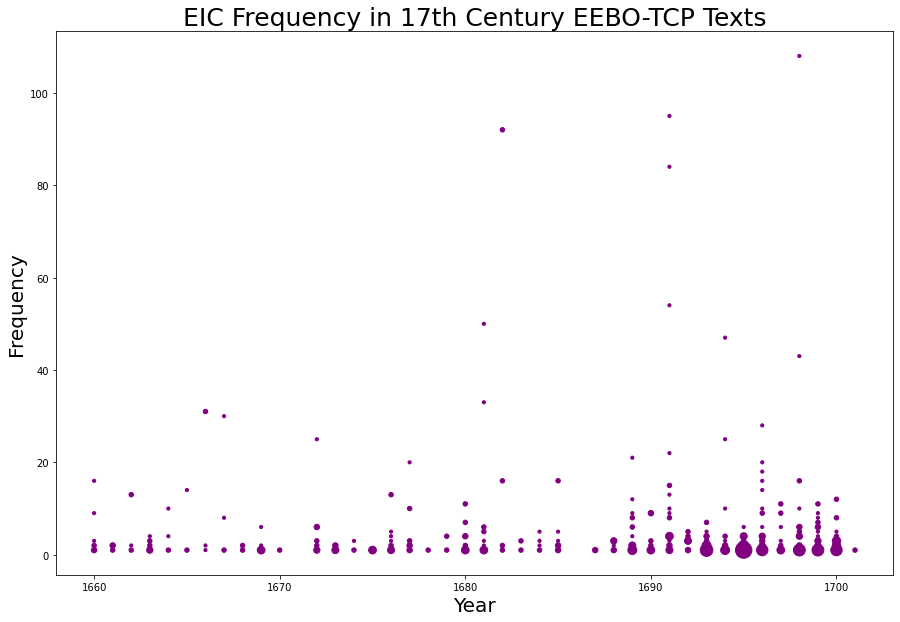

In [5]:
file = '/home/rapiduser/Materials/restoration.csv'
# freqOverTime(file, eic,1600,1700+1)
scatter(dates,freqs,"EIC Frequency in 17th Century EEBO-TCP Texts","purple","Year","Frequency")

In [ ]:
bar(freqs.keys(),freqs.values(),"Number of Texts Mentioning EIC and Monopoly","Year","Number of Texts")

In [ ]:
totalWordFreqs = {}
i=0
while (i!=len(dates)):
    if dates[i] not in totalWordFreqs.keys():
        totalWordFreqs[dates[i]] = 0
    totalWordFreqs[dates[i]] += freqs[i]
    i+=1
bar(totalWordFreqs.keys(),totalWordFreqs.values(),"Total Consumption Term Frequency Per Year","Year","Frequency")